# Merging layers of napari annotations

In [ ]:
import zarr 
import numpy as np
import imageio
import glob
import os
raw_files = sorted(glob.glob("/mnt/efs/aimbl_2025/student_data/S-LS/raw_bacteria/*.tif"))
mask_files = sorted(glob.glob("/mnt/efs/aimbl_2025/student_data/S-LS/mask_bacteria/*.tif"))
raw_images = [imageio.imread(f) for f in raw_files]
mask_images= [imageio.imread(f) for f in mask_files]
def merge_instance_masks(arr1: np.ndarray,
                         arr2: np.ndarray,
                         prefer: str = "arr1"):
    if arr1.shape != arr2.shape:
        raise ValueError(f"Shapes must match, got {arr1.shape} vs {arr2.shape}")
    a1 = np.asarray(arr1).astype(np.uint32, copy=False)
    a2 = np.asarray(arr2).astype(np.uint32, copy=False)
    max1 = int(a1.max())  # max label in first mask (0 is background)
    offset = max1
    a2_off = a2.copy()
    mask2_fg = a2_off > 0
    a2_off[mask2_fg] = a2_off[mask2_fg] + offset
    if prefer == "arr1":
        # Keep arr1 where it already has labels; fill only where arr1 is 0
        merged = a1.copy()
        fill = (merged == 0) & (a2_off > 0)

        merged[fill]=a2_off[fill]
        
    else:
        raise ValueError("prefer must be 'arr1', 'arr2', or 'error'.")
    return merged, offset

def save_merged_mask(merged, base_path, extra_path):
    folder = os.path.dirname(base_path)
    base_name = os.path.basename(base_path)
    root, ext = os.path.splitext(base_name)
    new_name = f"{root}_merged{ext}"
    save_path = os.path.join(folder, new_name)
    imageio.imwrite(save_path, merged.astype("uint16"))
    print(f"Saved merged mask to: {save_path}")
    return save_path

mask_folder="/mnt/efs/aimbl_2025/student_data/S-LS/mask_bacteria"

arr1 = imageio.imread(os.path.join(mask_folder, "mask_009_bacteria.tif"))
arr2 = imageio.imread(os.path.join(mask_folder, "mask_009_bacteria-2.tif"))

merged, _ = merge_instance_masks(arr1, arr2, prefer="arr1")

save_merged_mask(merged, "mask_009_bacteria.tif", "mask_009_bacteria-2.tif")

In [2]:
import matplotlib.pyplot as plt
import imageio as iio
import numpy as np

/tmp/ipykernel_375579/2850454407.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_003_merged = iio.imread("/mnt/efs/aimbl_2025/student_data/S-LS/cropped/0_0_mask.tif")


(512, 512) uint16


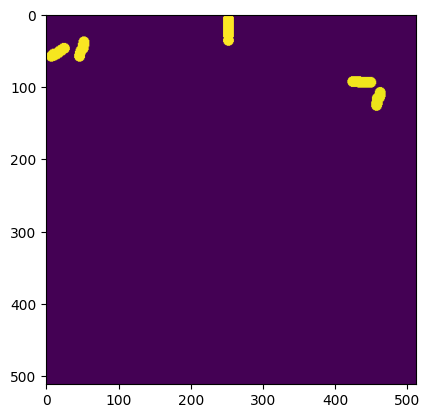

In [3]:
mask_003_merged = iio.imread("/mnt/efs/aimbl_2025/student_data/S-LS/cropped/0_0_mask.tif")
#mask_003_merged = iio.imread("/mnt/efs/aimbl_2025/student_data/S-LS/mask_bacteria/mask_003_bacteria_merged.tif")
plt.imshow(mask_003_merged)
np.unique(mask_003_merged)
print(mask_003_merged.shape, mask_003_merged.dtype)

/tmp/ipykernel_355568/1460360942.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  input_003=iio.imread ("/mnt/efs/aimbl_2025/student_data/S-LS/mask_bacteria/mask_009_bacteria.tif")
/tmp/ipykernel_355568/1460360942.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  other_input_003=iio.imread ("/mnt/efs/aimbl_2025/student_data/S-LS/mask_bacteria/mask_009_bacteria-2.tif")
/tmp/ipykernel_355568/1460360942.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

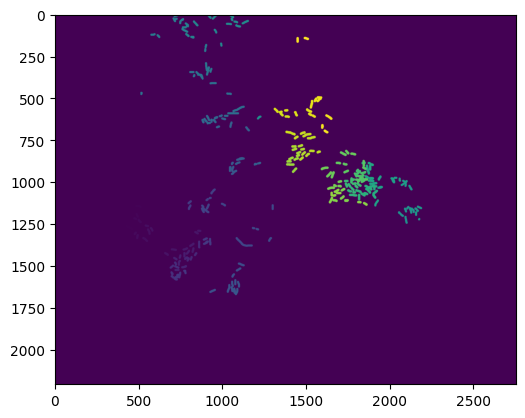

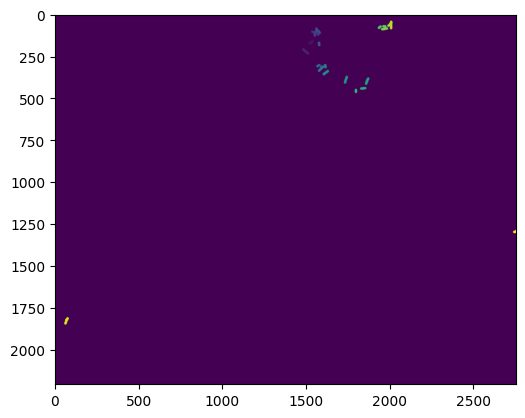

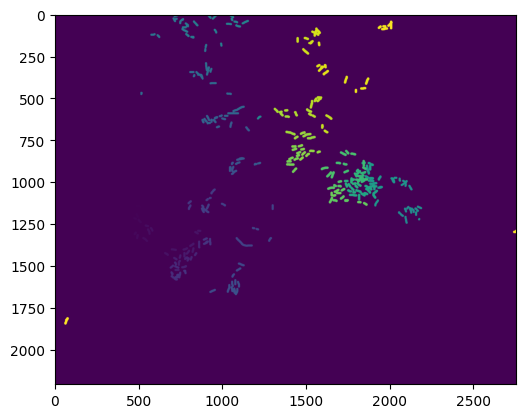

In [14]:
input_003=iio.imread ("/mnt/efs/aimbl_2025/student_data/S-LS/mask_bacteria/mask_009_bacteria.tif")
other_input_003=iio.imread ("/mnt/efs/aimbl_2025/student_data/S-LS/mask_bacteria/mask_009_bacteria-2.tif")
mask_003_merged = iio.imread("/home/S-LS/AI-MBL-2025/masketeers/mask_009_bacteria_merged.tif")

plt.figure()
plt.imshow(input_003)
plt.figure()
plt.imshow(other_input_003) 
plt.figure()
plt.imshow(mask_003_merged)

np.unique(mask_003_merged)

# Creating zarr


In [ ]:
import zarr 
import numpy as np
import imageio
import glob
import os
raw_files = sorted(glob.glob("/mnt/efs/aimbl_2025/student_data/S-LS/raw_bacteria/*.tif"))
mask_files = sorted(glob.glob("/mnt/efs/aimbl_2025/student_data/S-LS/mask_bacteria/*.tif"))
raw_images = [imageio.imread(f) for f in raw_files]
mask_images= [imageio.imread(f) for f in mask_files]
print (len(raw_images))



import os
from pathlib import Path
import glob
import numpy as np
import imageio
import zarr

# Inputs
mask_dir = "/mnt/efs/aimbl_2025/student_data/S-LS/mask_bacteria"
raw_dir  = "/mnt/efs/aimbl_2025/student_data/S-LS/raw_bacteria"

# Output Zarr store
store_path = "/mnt/efs/aimbl_2025/student_data/S-LS/my_data2.zarr"
zarr.open(store_path, zarr_version=2)

# Open/create root and subgroups
root = zarr.group(store_path)
masks_grp = root.create_group("mask_bacteria") 
raw_grp   = root.create_group("bacteria")    

def stack_and_write(img_folder, group, dataset_name, chunks=(1,552,688)):
    files = sorted(glob.glob(os.path.join(img_folder, "*.tif")))
    N = len(files)
    # Load all images, stack to (N, H, W)
    stack = np.stack([imageio.imread(f) for f in files], axis=0)
    N, H, W = stack.shape
    

    ds = group.create_array(name=dataset_name, shape=(N, H, W), chunks=chunks, dtype="uint16")
    ds[...] = stack

    ds.attrs["filenames"] = [Path(f).name for f in files]

    print(f" Wrote '{group.path}/{dataset_name}' | shape={(N,H,W)} | chunks={chunks} | dtype=uint16")

# Build the two stacks
stack_and_write(mask_dir, masks_grp, "masks_bacteria_stack", chunks=(1,552,688))
stack_and_write(raw_dir,  raw_grp,   "raw_bacteria_stack",   chunks=(1,552,688))


print(root.tree())
print("hola")


['mask_bacteria', 'bacteria']
(12, 2208, 2752) uint16 (1, 552, 688)
(552, 688)


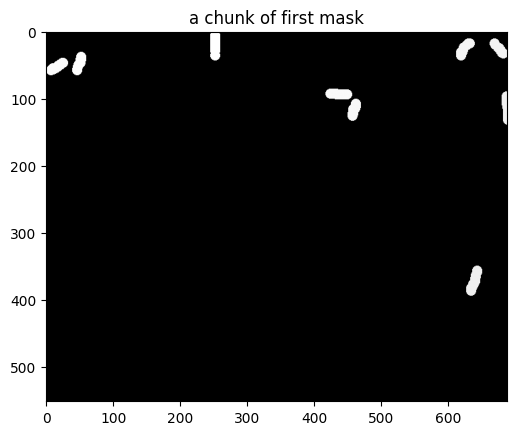

['mask_001_bacteria.tif', 'mask_002_bacteria.tif', 'mask_003_bacteria.tif', 'mask_004_bacteria.tif', 'mask_005_bacteria.tif', 'mask_006_bacteria.tif', 'mask_007_bacteria.tif', 'mask_008_bacteria.tif', 'mask_009_bacteria.tif', 'mask_010_bacteria.tif', 'mask_011_bacteria.tif', 'mask_012_bacteria.tif']


In [18]:
import zarr
import matplotlib.pyplot as plt

store_path = "/mnt/efs/aimbl_2025/student_data/S-LS/my_data.zarr"
root = zarr.open(store_path, mode="r")
print(list(root.keys())) 
masks = root["mask_bacteria"]["masks_bacteria_stack"]
print(masks.shape, masks.dtype, masks.chunks)

chunk2 = masks[0, 0:552, 688:1376]
print(chunk2.shape)  
plt.imshow(chunk, cmap="gray")
plt.title("a chunk of first mask")
plt.show()

print(masks.attrs["filenames"])
